<a href="https://colab.research.google.com/github/TheHstler/Machine-Learning-Assingment-2/blob/main/ml_weather_checkpoint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment

**Dataset**:       WEATHER CLASSIFICATION


## Imports

Add imports here as needed.

Remember to **re-run the cell when you add imports**, so it gets loaded into the virtual notebook environment!

In [15]:
# Data and Datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import DBSCAN

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Hyper-parameter optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Feature selection & feature engineering
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

# Stats
from scipy.stats import randint as sp_randint
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro     # Shapiro Wilk
from scipy.stats import normaltest  # D’Agostino’s K^2
from scipy.stats import anderson    # Anderson-Darling
from scipy.stats import ttest_ind    # independent student t-test; assumes normality
from scipy.stats import mannwhitneyu # non-parametric; doesn't assume normality

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz

# Utils
import pprint
import numpy as np
from time import time
import openpyxl

## Loading the dataset

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd

df = pd.read_csv('drive/MyDrive/Two datasets/weather_dataset.csv')

# printing out dataset info
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temperature           10392 non-null  float64
 1   humidity              12977 non-null  float64
 2   wind_speed            12967 non-null  float64
 3   precipitation         9099 non-null   float64
 4   cloud_cover           12970 non-null  object 
 5   atmospheric_pressure  12961 non-null  float64
 6   season                12962 non-null  object 
 7   visibility            12968 non-null  float64
 8   location              12968 non-null  object 
 9   weather               13200 non-null  object 
dtypes: float64(6), object(4)
memory usage: 1.0+ MB
None


,temperature,humidity,wind_speed,precipitation,cloud_cover,atmospheric_pressure,season,visibility,location,weather
0,14.0,73.0,9.5,82.0,partly cloudy,1010.82,Winter,3.5,inland,Rainy
1,39.0,96.0,8.5,71.0,partly cloudy,1011.43,Spring,10.0,inland,Cloudy
2,NaN,0.0,7.0,NaN,clear,1018.72,Spring,5.5,mountain,Sunny
3,38.0,83.0,1.5,82.0,clear,1026.25,Spring,1.0,coastal,Sunny
4,NaN,74.0,17.0,NaN,overcast,990.67,Winter,2.5,mountain,Rainy


In [18]:
df.describe()

,temperature,humidity,wind_speed,precipitation,atmospheric_pressure,visibility
count,10392.000000,12977.000000,12967.000000,9099.000000,12961.000000,12968.000000
mean,19.148768,65.258457,9.829837,53.639081,1005.882164,5.468924
std,17.367761,24.753316,6.906346,31.961687,37.190289,3.371322
min,-25.000000,0.000000,0.000000,0.000000,800.120000,0.000000
25%,4.000000,54.000000,5.000000,19.000000,994.810000,3.000000
50%,21.000000,69.000000,9.000000,58.000000,1007.690000,5.000000
75%,31.000000,83.000000,13.500000,82.000000,1016.790000,7.500000
max,108.000000,109.000000,48.500000,109.000000,1199.210000,20.000000


## Exploratory data analysis

Section for exploratory data analysis, to address **Tasks 1.1 and 1.2**.

**OBS:** You may need to do some data cleaning before you do your full exploratory data analysis, though you will find that some functions we'll cover in this unit are able to handle things like missing values and non-numeric data.

**Create more cells as needed!**

In [19]:
# TODO'S: Missing Values? Noise/Outliers? Duplicates? Class Imbalance?

In [20]:
#To find out missing values
print("Missing Values in the Diabetes Dataset")
print(df.isnull().sum())

Missing Values in the Diabetes Dataset
temperature             2808
humidity                 223
wind_speed               233
precipitation           4101
cloud_cover              230
atmospheric_pressure     239
season                   238
visibility               232
location                 232
weather                    0
dtype: int64


Noise in Dataset


<Axes: >

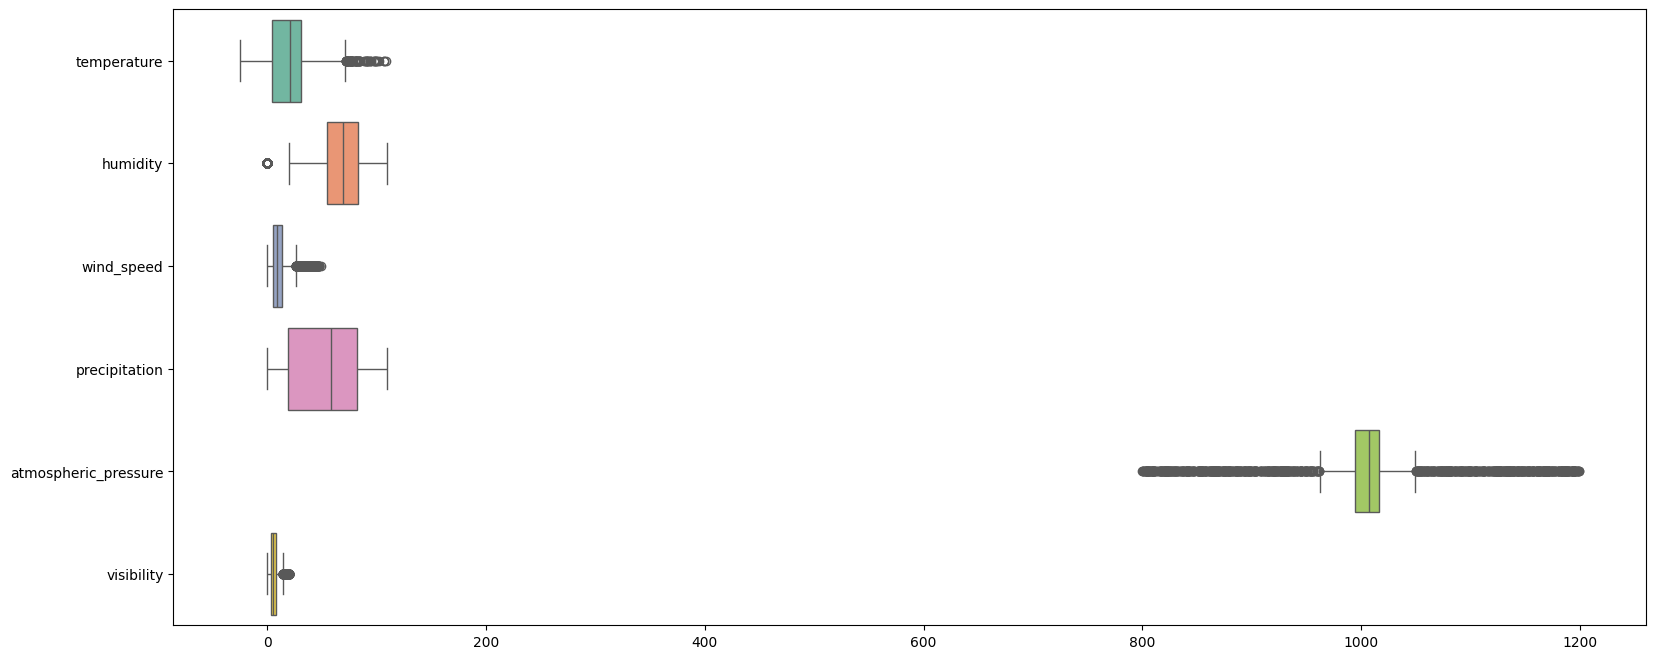

In [21]:
#To find out if there is any noise or Outliers
import seaborn as sns

# Set the figure size
plt.figure(figsize=(19, 8))

print("Noise in Dataset")
sns.boxplot (data=df, orient="h", palette="Set2")

<ipython-input-22-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


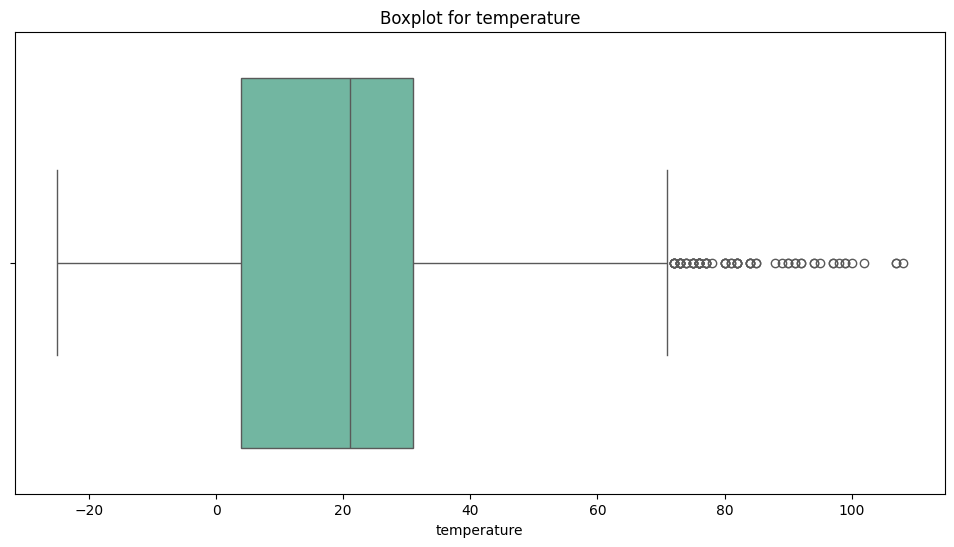

<ipython-input-22-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


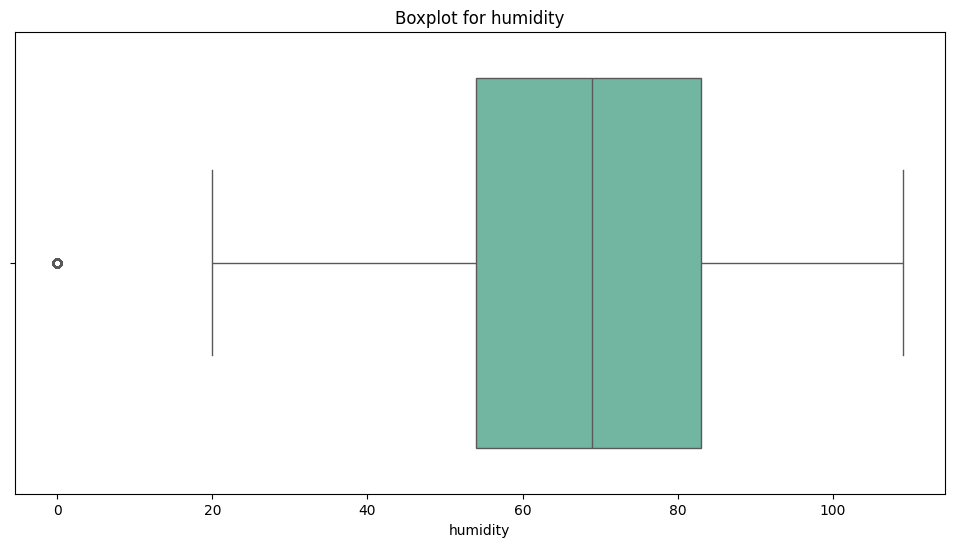

<ipython-input-22-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


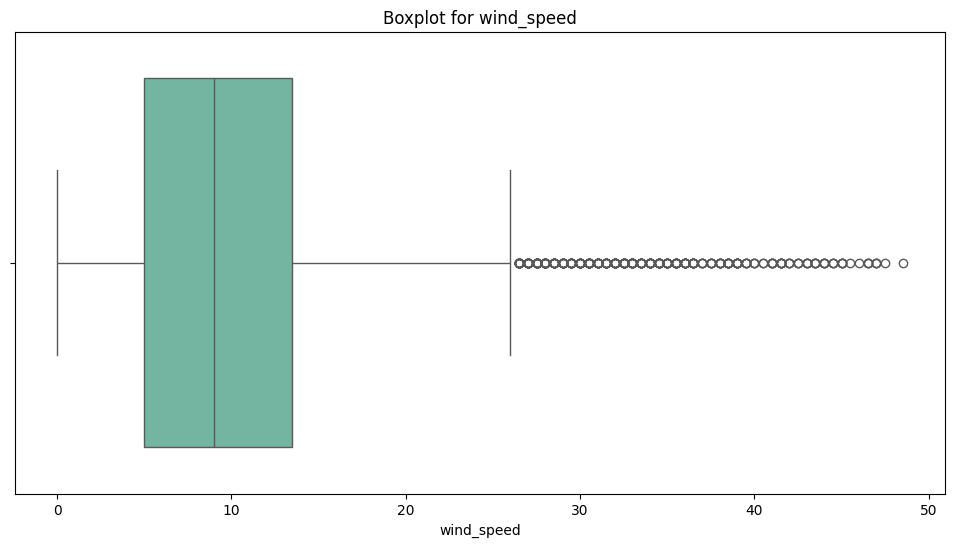

<ipython-input-22-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


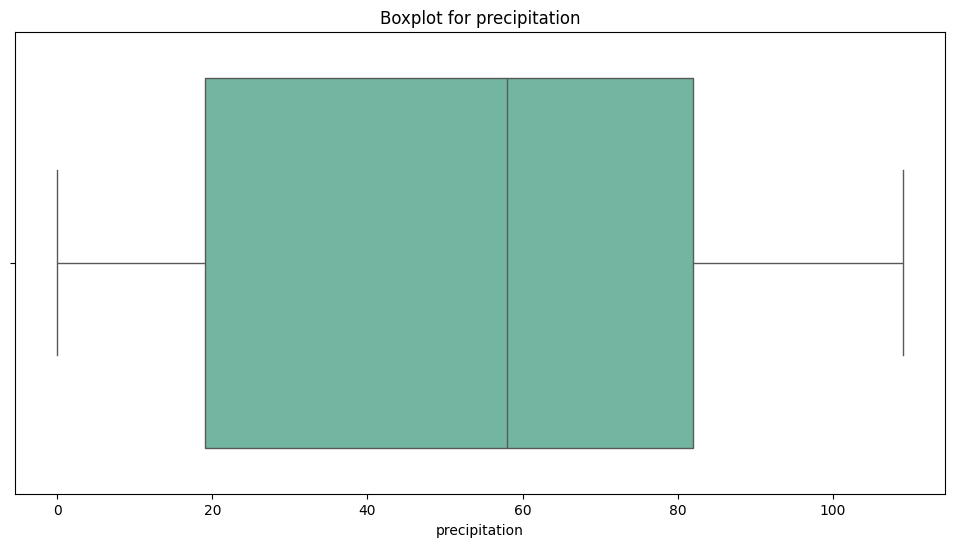

<ipython-input-22-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


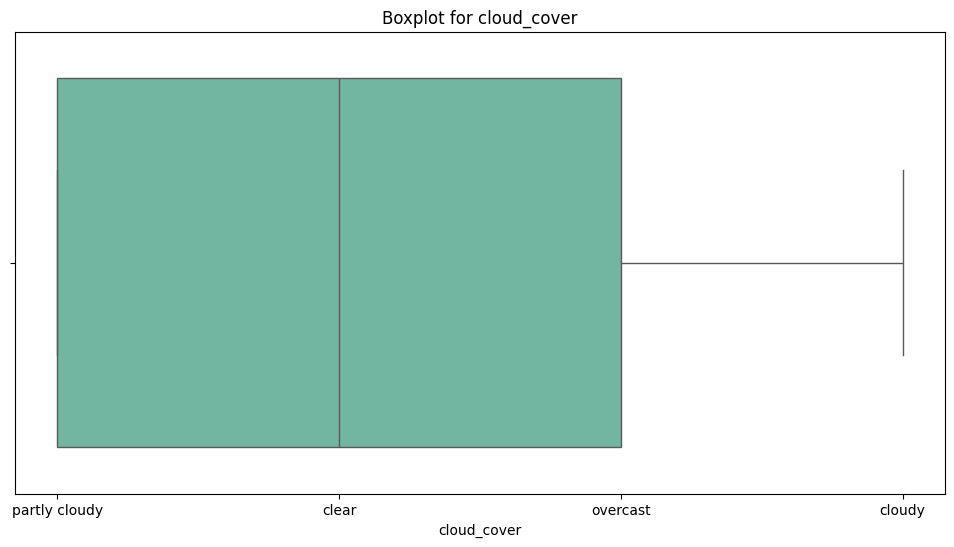

<ipython-input-22-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


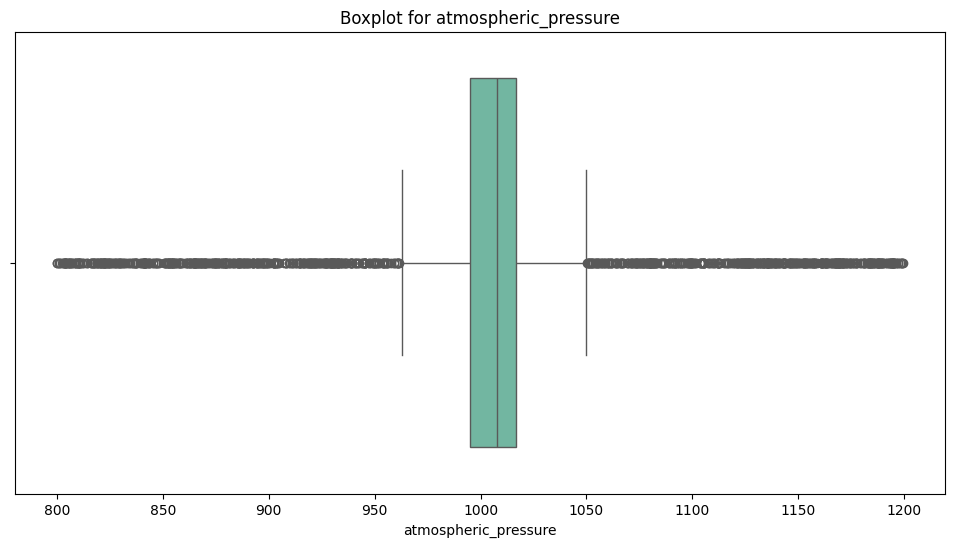

<ipython-input-22-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


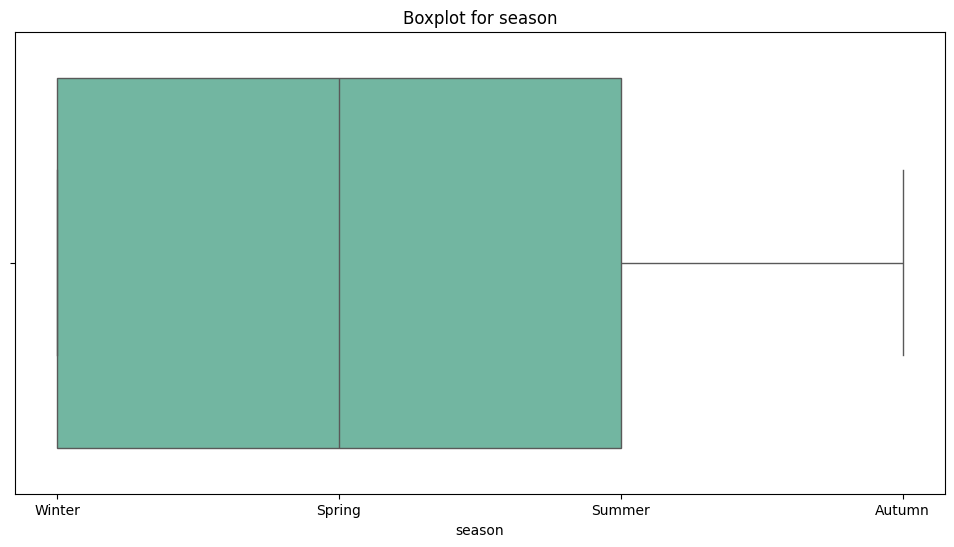

<ipython-input-22-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


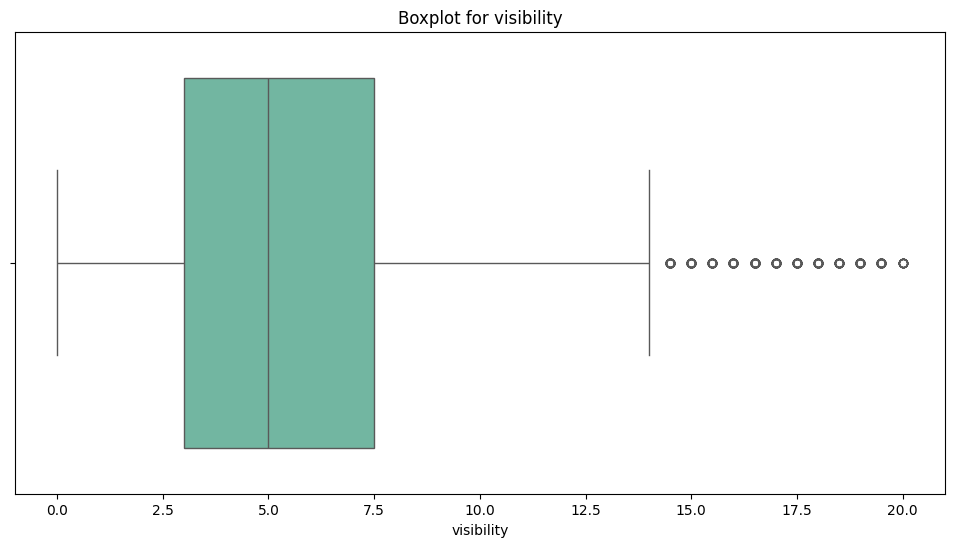

<ipython-input-22-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


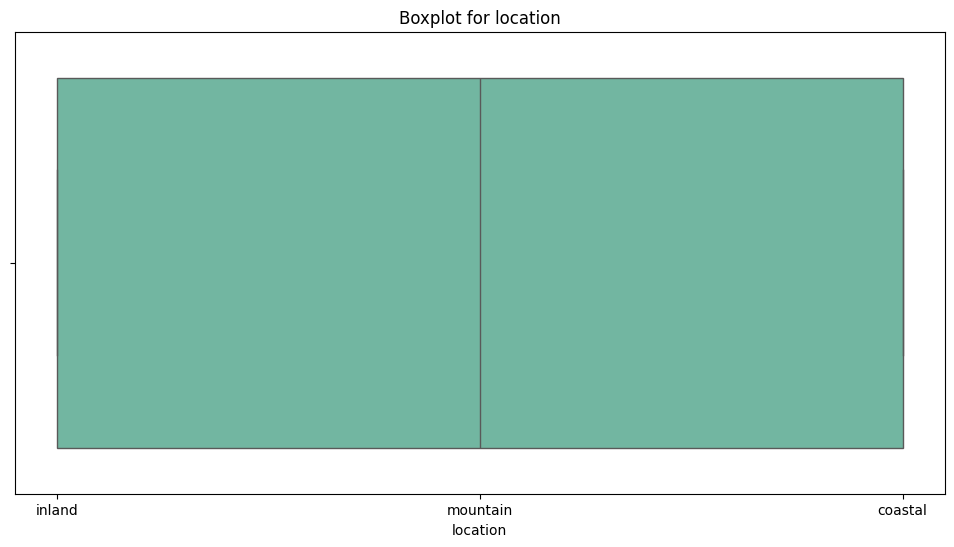

<ipython-input-22-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


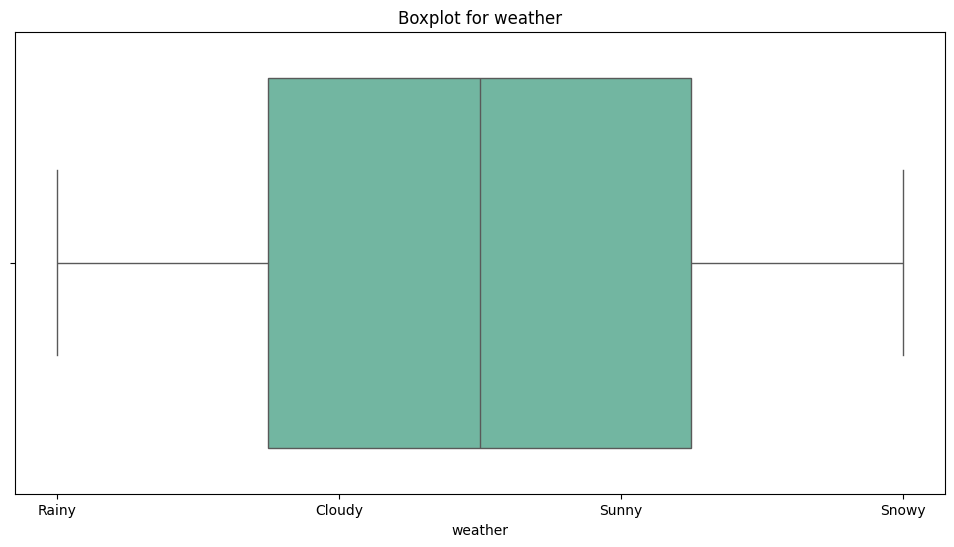

In [22]:
# Loop through each feature (column) in the dataframe
for column in df.columns:
    plt.figure(figsize=(12, 6))  # Optional: Adjust the size of the plot
    sns.boxplot(data=df, x=column, palette="Set2")
    plt.title(f"Boxplot for {column}")  # Title for each boxplot
    plt.show()  # Display the boxplot

In [23]:
df.duplicated().value_counts()

,count
False,13075
True,125


In [24]:
#What rows are the duplicates from?
df.loc[df.duplicated,:]

,temperature,humidity,wind_speed,precipitation,cloud_cover,atmospheric_pressure,season,visibility,location,weather
527,NaN,NaN,NaN,NaN,NaN,NaN,Summer,NaN,NaN,Rainy
1160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cloudy
1614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rainy
1652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cloudy
1654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cloudy
...,...,...,...,...,...,...,...,...,...,...
12274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inland,Snowy
12577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Snowy
12673,NaN,NaN,NaN,79.0,NaN,NaN,NaN,NaN,NaN,Rainy
13062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,coastal,Rainy


In [25]:
# Count the occurrences of each weather condition
weather_counts = df['weather'].value_counts()

print("Class balance for 'weather' column:")
print(weather_counts)

Class balance for 'weather' column:
weather
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


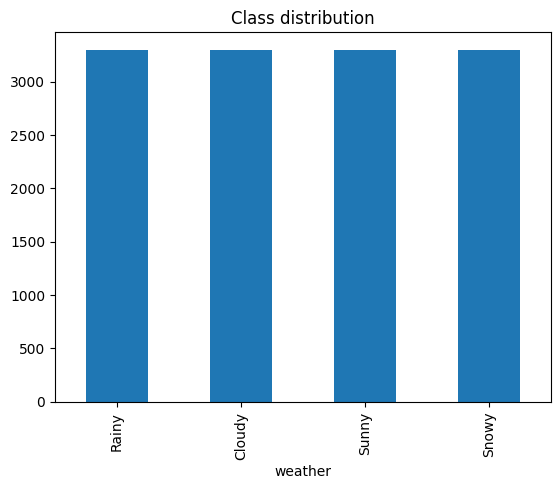

In [26]:
# a bar chart for the 'class' distribution
df['weather'].value_counts().plot(kind='bar', title='Class distribution');

## Task 2.1 - ML Workflow to Critically Evaluate

In [27]:
# Dropping all rows with missing values
df = df.dropna()

# Converting all non-numeric (object) features to numeric
cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('category')) # converting 'object' columns to 'category' type
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes) # converting the 'category' columns to integer encoded values

<ipython-input-27-d3c05b3d5a77>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('category')) # converting 'object' columns to 'category' type
<ipython-input-27-d3c05b3d5a77>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes) # converting the 'category' columns to integer encoded values


In [28]:
# Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
X = df.iloc[:,:len(df.columns)-1]
y = df.iloc[:,len(df.columns)-1]

# Splitting dataset for hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                    y, # label vector
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=None
                                                   )

# Creating and testing a Logistic Regression Model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)

# Printing out confusion matrix and accuracy
print(metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy (Testing):  %0.2f " % (metrics.accuracy_score(y_test, y_pred)))

[[222  45  17  67]
 [ 26 315  13  13]
 [  8  14 317  10]
 [ 41  42  14 296]]

Accuracy (Testing):  0.79 


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Task 2.3 - Evaluation of Improved ML Workflow

Add code for running your **improved** machine learning experiments below.


In [29]:
# Loading the dataset again, for you to do your own pre-processing (instead of what was done above)
 = pd.read_csv('drive/MyDrive/Two datasets/weather_dataset.csv')

In [30]:
# EDA for the diabetes dataset
print("Missing Values in the Diabetes Dataset")
print(.isnull().sum())

Missing Values in the Diabetes Dataset
temperature             2808
humidity                 223
wind_speed               233
precipitation           4101
cloud_cover              230
atmospheric_pressure     239
season                   238
visibility               232
location                 232
weather                    0
dtype: int64


In [31]:
rows_with_missing = df1.isnull().any(axis=1).sum()
p(f"\nTotal rows with missing values: {rows_with_missing}")


Total rows with missing values: 5904


<Axes: ylabel='Missing Values'>

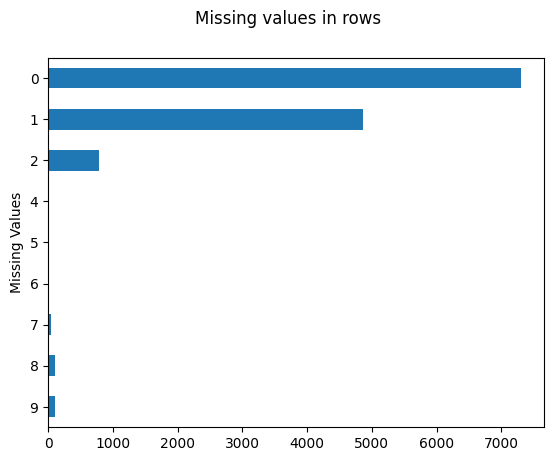

In [32]:
plt.figure()
plt.suptitle('Missing values in rows')
#plt.ylabel('Frequency')
plt.ylabel('Missing Values')
plt.xlabel('Rows')
.isnull().sum(axis=1).value_counts().sort_index(ascending=False).plot(kind="barh")

In [33]:
# Count the occurrences of each weather condition
diabetes_counts = d['diabetes'].value_counts()
print("Class balance for 'diabetes' column:")
print(diabetes_counts)

KeyError: 'diabetes'

In [ ]:
# a bar chart for the 'class' distribution
1['diabetes'].value_counts().plot(kind='bar', title='Class distribution');

# Exploratory Data Analysis For Weather

In [ ]:
# EDA for the diabetes dataset
print("Missing Values in the Diabetes Dataset")
print(d.isnull().sum())